### 신용위험 및 금리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
credit_pread = pd.read_excel('../../Data/finance/회사채 신용 스프레드.xlsx', index_col = 0)

In [24]:
credit_pread.index = pd.to_datetime(credit_pread.index)

In [25]:
# credit_pread.resample('M').mean().to_excel('../../Data/finance/회사채 신용 스프레드M.xlsx')

In [9]:
#credit_pread.to_excel('../../Data/finance/회사채 신용 스프레드M.xlsx')

In [26]:
yeild_spread = pd.read_excel('../../Data/finance/장단기 금리 스프레드.xlsx', index_col = 0)

In [27]:
yeild_spread.index = pd.to_datetime(yeild_spread.index)

In [28]:
#yeild_spread.resample('M').mean().to_excel('../../Data/finance/장단기 금리 스프레드M.xlsx')

단기자금시장

In [17]:
cp = pd.read_excel('../../Data/finance/주요 단기 시장금리.xlsx', index_col = 0)

In [19]:
cp.index = pd.to_datetime(cp.index)

In [29]:
cp.resample('M').mean().to_excel('../../Data/finance/주요 단기 시장금리M.xlsx')

콜금리

In [30]:
call = pd.read_excel('../../Data/finance/기준금리 및 콜금리.xlsx', index_col = 0)

In [33]:
call.index = pd.to_datetime(call.index)

In [34]:
# call.resample('M').mean().to_excel('../../Data/finance/콜금리M.xlsx')

#### Credit & interest rate

In [47]:
credit = pd.read_excel('../../Data/finance/credit.xlsx', index_col = 0) * 0.01

In [48]:
credit.index = pd.date_range(start = '2000-01-01', end = '2023-12-01', freq = 'M').strftime('%Y-%m')
credit.index = pd.to_datetime(credit.index)

In [50]:
credit = credit.loc['2001':].dropna()

In [51]:
credit

,CDS_premium_AA,CDS_premium_BBB,spread_3y,bond_spread,CD_3mon,CP_3mon,credit_int_rate,deposit_int_rate,credit_deposit_spread,overnight_rate
2001-01-01,0.017574,0.056479,0.007526,0.006600,0.064395,0.069753,0.0845,0.0666,0.0179,0.052695
2001-02-01,0.013665,0.062185,0.003540,0.009805,0.057275,0.062810,0.0834,0.0609,0.0225,0.050830
2001-03-01,0.013167,0.062190,0.008424,0.011557,0.056814,0.061371,0.0826,0.0582,0.0244,0.049871
2001-04-01,0.013195,0.060375,0.015830,0.011530,0.058410,0.061405,0.0810,0.0574,0.0236,0.049840
2001-05-01,0.012418,0.057786,0.014586,0.011132,0.058550,0.061336,0.0799,0.0576,0.0223,0.049795
...,...,...,...,...,...,...,...,...,...,...
2023-05-01,0.008089,0.071935,-0.001697,0.000717,0.036440,0.040100,0.0512,0.0356,0.0156,0.035725
2023-06-01,0.008080,0.071968,0.000476,0.000636,0.037514,0.040110,0.0517,0.0369,0.0148,0.035653
2023-07-01,0.007985,0.071904,0.001383,0.000428,0.037471,0.040286,0.0511,0.0368,0.0143,0.035070
2023-08-01,0.007729,0.071822,0.002274,0.001326,0.037018,0.040300,0.0510,0.0365,0.0145,0.035399


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = credit.drop(['credit_int_rate','deposit_int_rate','credit_deposit_spread','overnight_rate','CDS_premium_AA'], axis = 1)
y = credit['CDS_premium_AA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = False)

model = RandomForestRegressor(n_estimators = 1000, 
                              random_state = 42,
                              criterion = 'squared_error',
                              max_depth = 6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 8.7203351578803e-06


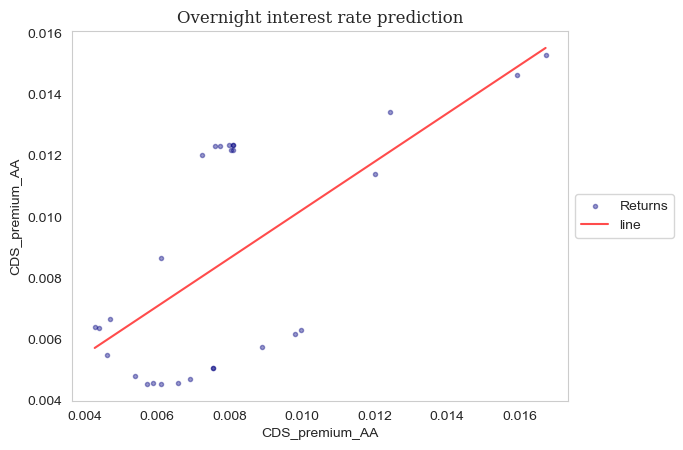

In [117]:
import seaborn as sns
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
#plt.axvline(0, color = 'grey', alpha = 0.5)
#plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Overnight interest rate prediction', fontfamily = 'Serif')
plt.grid(False)
plt.show()

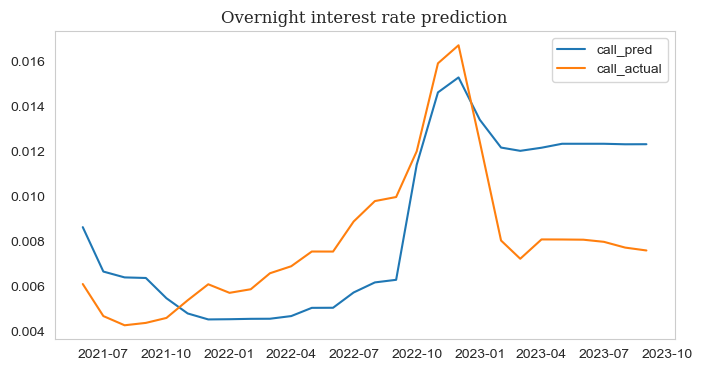

In [118]:
plt.figure(figsize = (8,4))
plt.plot(pd.Series(y_pred, index = X_test.index), label = 'call_pred')
plt.plot(y_test, label = 'call_actual')
plt.title('Overnight interest rate prediction', fontfamily = 'Serif')
plt.legend()
plt.grid(False)
plt.grid(False)

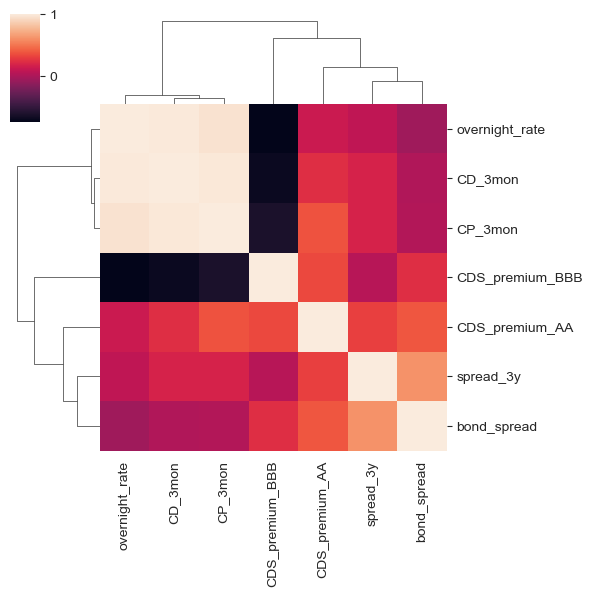

In [119]:
sns.clustermap(credit.drop(['credit_int_rate','deposit_int_rate','credit_deposit_spread'], axis = 1).corr(), figsize = (6,6))

In [120]:
#credit.to_csv('../../Cleaned_Data/credit.csv')